I know that assignment said to use notebook from tutorials but it looked to "heavy" in my opinion so I decided to just copy cells from third tutorial that are essential for this homework.

(Autor: Marian Kravec)

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot as plt
import numpy as np
import gzip
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import backend as K
import random as rd
import time as t


def get_data(shape='circles', n_samples=200, std=0.1):
    if (shape == 'sample'):
        X, y = make_blobs(n_samples, centers=2)
    elif(shape == 'circles'):
        X, y = make_circles(n_samples, noise=std)
    elif(shape == 'spiral'):
        X, y = make_moons(n_samples, noise=std)
    else:
        print("Unknow shape! Drawing random sample data.")
        X = np.random.rand(n_samples, 2) * std
        y = np.random.randint(0, 2, n_samples)
    return X, y


class PlotBuilder:

    def __init__(self, plot, n_samples, X, y):
        self.X = X
        self.y = y
        self.plot = plot
        x0_data = np.array(plot[0].get_xdata())
        y0_data = np.array(plot[0].get_ydata())
        x1_data = np.array(plot[1].get_xdata())
        y1_data = np.array(plot[1].get_ydata())

        self.class_0 = np.zeros((len(x0_data), 2))
        self.class_1 = np.zeros((len(x1_data), 2))

        self.class_0[:, 0] = x0_data
        self.class_0[:, 1] = y0_data

        self.class_1[:, 0] = x1_data
        self.class_1[:, 1] = y1_data

        plot[0].figure.canvas.mpl_connect('button_press_event', self)
        plot[1].figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        if event.inaxes != self.plot[0].axes:
            return

        if event.inaxes != self.plot[1].axes:
            return

        if event.button == 1:
            # right click
            self.class_0 = np.vstack((self.class_0,
                                      [event.xdata,
                                       event.ydata]))
        elif event.button == 3:
            # left click
            self.class_1 = np.vstack((self.class_1,
                                      [event.xdata,
                                       event.ydata]))

        self.X = np.vstack((self.class_0, self.class_1))
        self.y = np.array([0] * len(self.class_0) + [1] * len(self.class_1))
        self.plot[0].set_data(self.class_0[:, 0], self.class_0[:, 1])
        self.plot[1].set_data(self.class_1[:, 0], self.class_1[:, 1])
        self.plot[0].figure.canvas.draw()
        self.plot[1].figure.canvas.draw()


def show_plot(shape='cirles', n_samples=200, std=0.1):
    X, y = get_data(shape, n_samples, std)
    X_0 = X[y == 0]
    X_1 = X[y == 1]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Generated data of "{}" shape'.format(shape))
    class_1, = ax.plot(X_0[:, 0], X_0[:, 1], 'go')
    class_2, = ax.plot(X_1[:, 0], X_1[:, 1], 'ro')
    p = PlotBuilder([class_1, class_2], n_samples, X, y)

    plt.show()
    return p.X, p.y, p


def load_mnist(kind):
    labels_path = './{}-labels-idx1-ubyte.gz'.format(kind)
    images_path = './{}-images-idx3-ubyte.gz'.format(kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
    return images.reshape(len(images), 28, 28), labels


def visualize_mnist(X, y):
    label_idx = [y == i for i in range(10)]
    ims = np.array([X[label_idx[i]][:10] for i in range(10)])

    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    f, axarr = plt.subplots(10, 10, figsize=(12, 12))
    for i in range(10):
        axarr[0][i].set_title(classes[i])
        for j in range(10):
            axarr[i][j].imshow(ims[j][i], 'gray')
            axarr[i][j].axis('off')

    plt.show()

# Download data into the notebook environment
!wget -q https://github.com/NaiveNeuron/ml_exercises/raw/master/assignment3/test-images-idx3-ubyte.gz
!wget -q https://github.com/NaiveNeuron/ml_exercises/raw/master/assignment3/train-images-idx3-ubyte.gz
!wget -q https://github.com/NaiveNeuron/ml_exercises/raw/master/assignment3/test-labels-idx1-ubyte.gz
!wget -q https://github.com/NaiveNeuron/ml_exercises/raw/master/assignment3/train-labels-idx1-ubyte.gz

# Ensure matplotlib images are shown
%matplotlib inline

In [20]:
X_train, y_train = load_mnist('train')
print("Train data shape: {} | labels: {}".format(X_train.shape, y_train.shape))

X_test, y_test = load_mnist('test')
print("Test data shape: {} | labels: {}".format(X_test.shape, y_test.shape))

X_test_2, y_test_2 = load_mnist('test')
print("Test data shape: {} | labels: {}".format(X_test_2.shape, y_test_2.shape))

Train data shape: (60000, 28, 28) | labels: (60000,)
Test data shape: (10000, 28, 28) | labels: (10000,)
Test data shape: (10000, 28, 28) | labels: (10000,)


In [21]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
X_test_2 = X_test_2.reshape(-1, 28 * 28)
print("New train data shape: {} | test data: {}".format(X_train.shape, X_test.shape))

New train data shape: (60000, 784) | test data: (10000, 784)


We will use only first 1000 samples for training and only first 100 for validation to be able to compute it sensible amount of time

In [23]:
X_train = X_train[:1000, :]
y_train = y_train[:1000]
X_test = X_test[:100, :]
y_test = y_test[:100]
X_test_2 = X_test_2[100:, :]
y_test_2 = y_test_2[100:]

We will prepare fucntion that will take hyperparameters that we are optimizing as input and then train a model based on end. In the end it returns trained model and it's loss value

In [5]:
def train_model(n_layers, hidden_size, dropout_rate, n_epochs):
  mlp = Sequential()
  mlp.add(Dense(hidden_size, activation='tanh', input_dim=X_train.shape[1]))
  mlp.add(Dropout(dropout_rate))
  for i in range(n_layers - 1):
      mlp.add(Dense(hidden_size, activation='tanh'))
      mlp.add(Dropout(dropout_rate))
  mlp.add(Dense(10, activation='softmax'))

  mlp.compile(loss='categorical_crossentropy', optimizer=Adam(0.04),  metrics=['accuracy'])

  history = mlp.fit(X_train, to_categorical(y_train), epochs=n_epochs, validation_split=0.1, verbose=True)

  test_score = mlp.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

  return test_score[0], mlp

Our random function gets number of tries and then randomly set hyperparameters based on given intervals. After training model it compares it's loss to best loss it saw so far and if it's smaller it considers this model as current best.

In [6]:
def random_search(tries = 10):
  bestModel = None
  bestLoss = float("inf")
  bestParams = {"n_layers": None, "hidden_size": None, "dropout_rate": None, "n_epochs": None}
  improvements = dict()
  for i in range(tries):
    print(i)
    n_layers = rd.randint(1,5)
    hidden_size = rd.randint(10,1000)
    dropout_rate = rd.random()
    n_epochs = rd.randint(1,100)

    loss, model = train_model(n_layers, hidden_size, dropout_rate, n_epochs)

    if loss < bestLoss:
      bestLoss = loss
      bestModel = model
      improvements[i] = loss
      bestParams = {"n_layers": n_layers,
                    "hidden_size": hidden_size,
                    "dropout_rate": dropout_rate,
                    "n_epochs": n_epochs}
  return bestLoss, bestParams, bestModel, improvements

For grid search I decided to choose only few values because computations took pretty long time (in my opinion). For number of layers and dropout rate I used linear scale because number of layers have only few discrete values and dropout rate is on interval (0,1) which seems like perfect for linear scale. For hidden size and number of epoch I used logarithmic scale because difference in resulting model between 10 and 100 neurons is usually much bigger than difference between 100 and 200 neurons, and similarly for number of epochs.

In [7]:
def grid_search():
  bestModel = None
  bestLoss = float("inf")
  bestParams = {"n_layers": None, "hidden_size": None, "dropout_rate": None, "n_epochs": None}
  n_layers = [1,3,5] # we use linear scale for layers
  hidden_size = [10, 100, 1000] # we use logarithmic scale for hidden size
  dropout_rate = [0, 0.33, 0.66, 0.999] # we use linear scale for dropout rate
  n_epochs = [1, 10, 100] # we use logarithmic scale for number of epochs
  improvements = dict()
  i = 0
  for n_l in n_layers:
    for h_s in hidden_size:
      for d_r in dropout_rate:
        for n_e in n_epochs:
          loss, model = train_model(n_l, h_s, d_r, n_e)

          if loss < bestLoss:
            improvements[i] = loss
            bestLoss = loss
            bestModel = model
            bestParams = {"n_layers": n_l,
                          "hidden_size": h_s,
                          "dropout_rate": d_r,
                          "n_epochs": n_e}
          i+=1
  return bestLoss, bestParams, bestModel, improvements

We run random search using 70 tries, this value was choosen so that computation time would be simmilar to grid search... I know that one part of assignment was to compare computation time but... I will still try to compare using plot.

In [8]:
start = t.time()
bestRandomLoss, bestRandomParams, bestRandomModel, randImprov = random_search(70)
randomTime = t.time() - start

Streaming output truncated to the last 5000 lines.
Epoch 61/82
29/29 [==============================] - 0s 6ms/step - loss: 9.6635 - accuracy: 0.1122 - val_loss: 7.6246 - val_accuracy: 0.0800
Epoch 62/82
29/29 [==============================] - 0s 7ms/step - loss: 9.7425 - accuracy: 0.1000 - val_loss: 5.0640 - val_accuracy: 0.1600
Epoch 63/82
29/29 [==============================] - 0s 6ms/step - loss: 9.5471 - accuracy: 0.0722 - val_loss: 7.5965 - val_accuracy: 0.0800
Epoch 64/82
29/29 [==============================] - 0s 6ms/step - loss: 9.9935 - accuracy: 0.0978 - val_loss: 9.8329 - val_accuracy: 0.0800
Epoch 65/82
29/29 [==============================] - 0s 6ms/step - loss: 10.2910 - accuracy: 0.1033 - val_loss: 7.7353 - val_accuracy: 0.1500
Epoch 66/82
29/29 [==============================] - 0s 7ms/step - loss: 10.8075 - accuracy: 0.0900 - val_loss: 7.5173 - val_accuracy: 0.0800
Epoch 67/82
29/29 [==============================] - 0s 6ms/step - loss: 9.7855 - accuracy: 0.1100 - 

Then we run grid search

In [9]:
start = t.time()
bestGridLoss, bestGridParams, bestGridModel, gridImprov = grid_search()
gridTime = t.time() - start

Streaming output truncated to the last 5000 lines.
Epoch 66/100
29/29 [==============================] - 0s 6ms/step - loss: 2.3790 - accuracy: 0.1000 - val_loss: 2.3633 - val_accuracy: 0.0900
Epoch 67/100
29/29 [==============================] - 0s 6ms/step - loss: 2.3546 - accuracy: 0.0956 - val_loss: 2.3707 - val_accuracy: 0.0800
Epoch 68/100
29/29 [==============================] - 0s 6ms/step - loss: 2.3733 - accuracy: 0.0889 - val_loss: 2.3650 - val_accuracy: 0.0900
Epoch 69/100
29/29 [==============================] - 0s 6ms/step - loss: 2.3636 - accuracy: 0.0811 - val_loss: 2.3581 - val_accuracy: 0.0900
Epoch 70/100
29/29 [==============================] - 0s 6ms/step - loss: 2.3683 - accuracy: 0.0978 - val_loss: 2.3238 - val_accuracy: 0.0800
Epoch 71/100
29/29 [==============================] - 0s 6ms/step - loss: 2.3704 - accuracy: 0.0833 - val_loss: 2.3576 - val_accuracy: 0.0900
Epoch 72/100
29/29 [==============================] - 0s 7ms/step - loss: 2.3602 - accuracy: 0.09

In [10]:
print("Random search time: {}  | Grid search time: {}".format(randomTime, gridTime))
print("Random search loss: {}  | Grid search loss: {}".format(bestRandomLoss, bestGridLoss))

Random search time: 1105.3172261714935  | Grid search time: 1232.538575410843
Random search loss: 1.8979370594024658  | Grid search loss: 1.8778387308120728


We can see that after similar amount of time they ended with similar loss so based on this it seems that these method are similarly good.

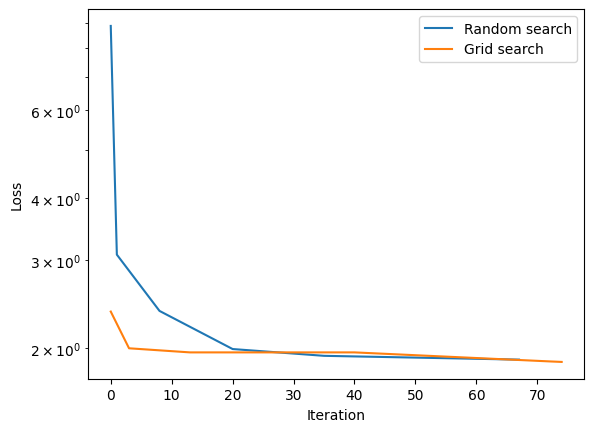

In [17]:
plt.plot(randImprov.keys(), randImprov.values(), label="Random search")
plt.plot(gridImprov.keys(), gridImprov.values(), label="Grid search")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

I am not sure what I wanted to show by this visual. We kinda can see that grid search was "lucky" and get pretty good results in very first try, but I am not sure if it's relevant because order of tests is in grid seach set beforhand. However what is maybe more interesting is that after 35 iterations random search had better results so if this is not fluke we could maybe reduce number of tries in random search to around 40 and get similar results to grid searh in approximately half the time.

As a very last thing let's try to evaluate both model on rest of test dataset that was not part of subset we used for faster computation to see which model is really better.

In [24]:
bestRandomModel.evaluate(X_test_2, tf.keras.utils.to_categorical(y_test_2))
bestGridModel.evaluate(X_test_2, tf.keras.utils.to_categorical(y_test_2))

310/310 [==============================] - 2s 5ms/step - loss: 1.9393 - accuracy: 0.1979


[1.9393103122711182, 0.19787879288196564]

We can see that even though both models have similar loss, model provided by grid seach seems to have better accuracy, so maybe we should consider it better.

All in all both method returned models that could be considered similarly good, random search can theoreticaly do it in half the time but grid search model seems to still be more accurate. I prefer time so I prefer random search :P